![Battery Life](https://sac0800fone.com/wp-content/uploads/2021/06/Aplicacoes-que-facilitam-a-sua-vida-e-ajuda-na-bateria-1800x600.jpg)


# Introduction

Remaining useful life (RUL) is the amount of time a machine or an asset is likely to operate before it requires repair or replacement. Depending on your system, this time period can be represented in number of Days, Miles, Cycles or any other quantity. RUL prediction provides early warnings of failure and has become a key component in the prognostics and health management of systems. It allows engineers to schedule maintenance, optimize operating efficiency and avoid unplanned downtime.

![RUL_Image (1).png](https://www.stratada.com/wp-content/uploads/2020/06/RUL_Image.png)

This image shows the deterioration of a machine over time. If A is the current condition and B is the minimum acceptable condition beyond which the machine will fail, Remaining Useful Life is computed as the time between these two points. If RUL is estimated in advance, maintenance or replacement can be carried out to avoid unplanned downtime and economic losses. Since the prediction of RUL is critical to operations and decision making, it is important to estimate it accurately.

reference: 'Remaining Useful Life (RUL) Prediction'( https://www.stratada.com/remaining-useful-life-rul-prediction/ )

# Downloading Dataset
https://www.kaggle.com/datasets/ignaciovinuales/battery-remaining-useful-life-rul

In [1]:
!pip install kaggle

!kaggle datasets download -d ignaciovinuales/battery-remaining-useful-life-rul

!unzip battery-remaining-useful-life-rul.zip

Dataset URL: https://www.kaggle.com/datasets/ignaciovinuales/battery-remaining-useful-life-rul
License(s): CC0-1.0
  0% 0.00/374k [00:00<?, ?B/s]
100% 374k/374k [00:00<00:00, 99.9MB/s]
Archive:  battery-remaining-useful-life-rul.zip
  inflating: Battery_RUL.csv         


# Importing Useful Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [3]:
df = pd.read_csv('./Battery_RUL.csv')

df.shape

(15064, 9)

In [5]:
df.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


# Correlation among features

<Axes: >

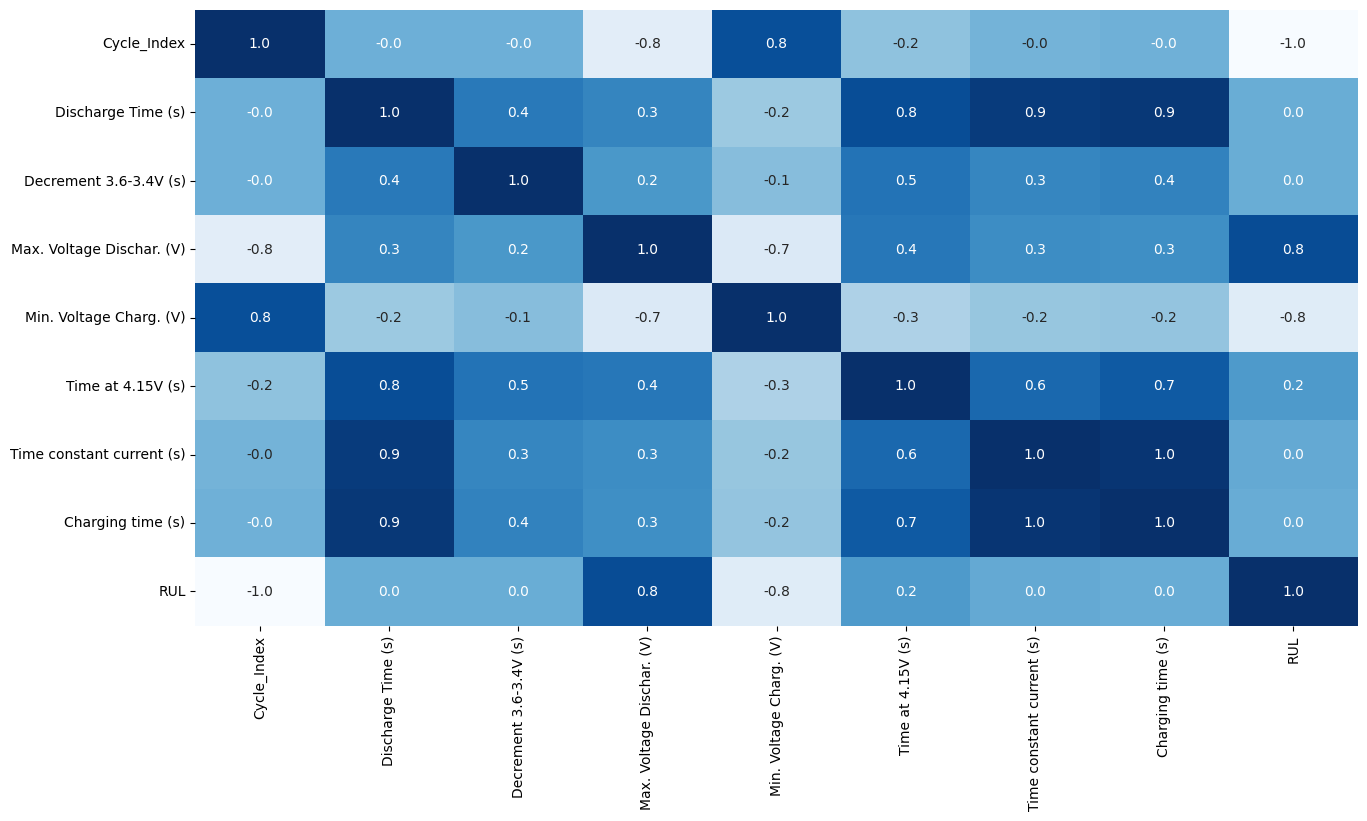

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')

Correlation between RUL and
* Max. Voltage Dischar. (V) is 0.8
* Min. Voltage Charg. (V) is -0.8
* Time at 4.15V (s) is 0.2
* Cycle index is -1.0
* Discharge Time (s), Decrement 3.6-3.4V (s), Time constant current (s) and Charging time (s)　are 0. And correlation between Time at 4.15V and these four features are 0.8, 0.5,0.6 and 0.7.

So I drop Discharge Time (s), Decrement 3.6-3.4V (s), Time constant current (s) and Charging time (s). And I drop 'Cycle_Index' from features because these features are relatively less useful and may cause leakage.

In [ ]:
df1 = df.drop(['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Time constant current (s)','Charging time (s)'], axis=1)

df1.head()

,Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),RUL
0,3.670,3.211,5460.001,1112
1,4.246,3.220,5508.992,1111
2,4.249,3.224,5508.993,1110
3,4.250,3.225,5502.016,1109
4,4.290,3.398,5480.992,1107


# Splitting the data for training and testing

In [ ]:
from sklearn.model_selection import train_test_split

# 'RUL' is your target variable
X = df1.drop('RUL', axis=1)
y = df1['RUL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (12051, 3)
Shape of y_train: (12051,)
Shape of X_test: (3013, 3)
Shape of y_test: (3013,)


## Training a Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test data
lr_y_pred = lr_model.predict(X_test)

In [ ]:
lr_y_pred

array([949.0674316 , 863.59607327, 573.36370342, ..., 762.65514806,
       521.15199399, 239.20556161])

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, lr_y_pred)
r2 = r2_score(y_test, lr_y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 33519.559821538205
R-squared: 0.6764071820917132


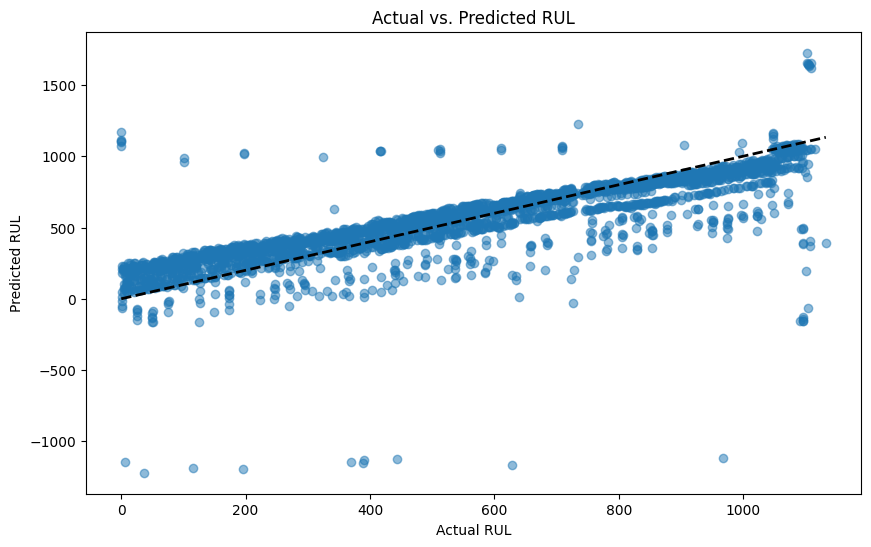

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs. Predicted RUL')
plt.show()

## Training a Random Forest Model

Random Forest - Mean Squared Error: 1108.8807866649713
Random Forest - R-squared: 0.9892950307106745


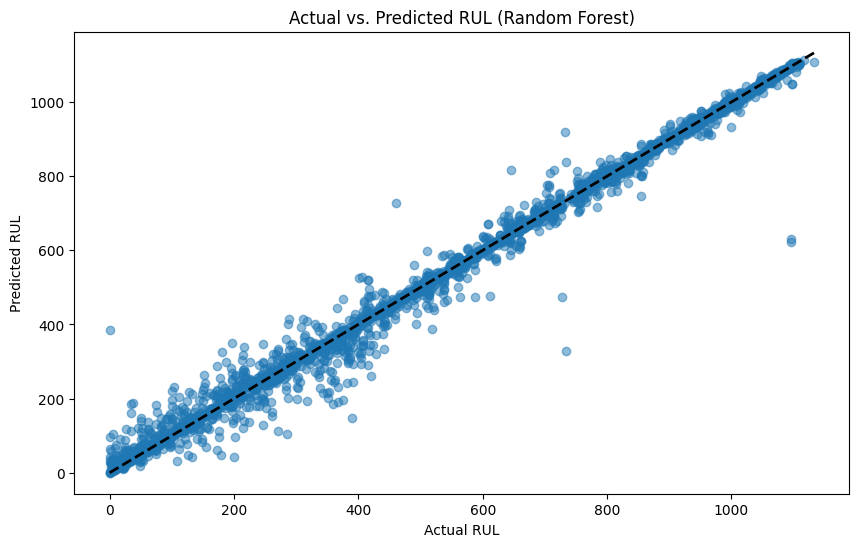

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("Random Forest - Mean Squared Error:", rf_mse)
print("Random Forest - R-squared:", rf_r2)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs. Predicted RUL (Random Forest)')
plt.show()